# **K-Medoids vs Fast K-Medoids**

## **Requirements**

In [23]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style('whitegrid')
import pickle
from sklearn.datasets import make_blobs


In [24]:
sys.path.insert(0, r'C:\Users\fscielzo\Documents\Packages\FastKmedoids_Package_Private')
from FastKmedoids.metrics import adjusted_accuracy
from FastKmedoids.data import outlier_contamination

## **Data**

- Same simulation schema as in the first simulation but with smaller data sizes.

In [25]:
data_sizes = [5000, 10000, 15000, 20000, 30000, 40000, 50000]
X_dict, Y = {}, {}

In [26]:
for size in data_sizes:

    X, Y[size] = make_blobs(n_samples=size, centers=4, cluster_std=[2,2,2,3], n_features=8, random_state=123)
    X = pd.DataFrame(X)      
    X.columns = [f"X{i}" for i in range(1, X.shape[1]+1)]

    # Se convierten dos variables cuantitativas a binarias, y otras dos a multiclase, discretizandolas.
    X['X5'] = pd.cut(X['X5'], bins=[X['X5'].min()-1, X['X5'].mean(), X['X5'].max()+1], labels=False)
    X['X6'] = pd.cut(X['X6'], bins=[X['X6'].min()-1, X['X6'].mean(), X['X6'].max()+1], labels=False)
    X['X7'] = pd.cut(X['X7'], bins=[X['X7'].min()-1, X['X7'].quantile(0.25), X['X7'].quantile(0.50), X['X7'].quantile(0.75), X['X7'].max()+1], labels=False)
    X['X8'] = pd.cut(X['X8'], bins=[X['X8'].min()-1, X['X8'].quantile(0.25), X['X8'].quantile(0.50), X['X8'].quantile(0.75), X['X8'].max()+1], labels=False)   

    X = outlier_contamination(X, col='X1', below=False, above=True, prop_above=0.05, dil=2, random_state=123)
    X = outlier_contamination(X, col='X2', above=False, below=True, prop_below=0.05, dil=2, random_state=123)
    X_dict[size] = X.to_numpy().copy()

In [27]:
model_names = ['K-Medoids-Euclidean', 'K-Medoids-GG_RobustMaha', 'Fast K-Medoids-GG_RobustMaha']
cluster_labels, times = {model: {} for model in model_names}, {model: {} for model in model_names}

## **Analysis**

In [28]:
'''
frac_sample_size = {}
for size in data_sizes:
    if size <= 15000:
        frac_sample_size[size] = 0.02
    elif size > 15000 and size < 35000:
        frac_sample_size[size] = 0.015
    elif size >= 35000 and size < 50000:
        frac_sample_size[size] = 0.01
    elif size == 50000:
        frac_sample_size[size] = 0.007
'''

'\nfrac_sample_size = {}\nfor size in data_sizes:\n    if size <= 15000:\n        frac_sample_size[size] = 0.02\n    elif size > 15000 and size < 35000:\n        frac_sample_size[size] = 0.015\n    elif size >= 35000 and size < 50000:\n        frac_sample_size[size] = 0.01\n    elif size == 50000:\n        frac_sample_size[size] = 0.007\n'

In [29]:
'''
for size in data_sizes:
    print(size)
 
    fast_kmedoids = FastKmedoidsGG(n_clusters=4, method='pam', init='heuristic', max_iter=100, random_state=123,
                                    frac_sample_size=frac_sample_size[size], p1=4, p2=2, p3=2, d1='robust_mahalanobis', d2='jaccard', d3='matching', 
                                    robust_maha_method='trimmed', alpha=0.05, epsilon=0.05, n_iters=20, VG_sample_size=1000, VG_n_samples=5)
    start_time = time.time()
    fast_kmedoids.fit(X=X_dict[size]) 
    end_time = time.time()
    times['Fast K-Medoids-GG_RobustMaha'][size] = end_time - start_time
    cluster_labels['Fast K-Medoids-GG_RobustMaha'][size] = fast_kmedoids.labels
'''

"\nfor size in data_sizes:\n    print(size)\n \n    fast_kmedoids = FastKmedoidsGG(n_clusters=4, method='pam', init='heuristic', max_iter=100, random_state=123,\n                                    frac_sample_size=frac_sample_size[size], p1=4, p2=2, p3=2, d1='robust_mahalanobis', d2='jaccard', d3='matching', \n                                    robust_maha_method='trimmed', alpha=0.05, epsilon=0.05, n_iters=20, VG_sample_size=1000, VG_n_samples=5)\n    start_time = time.time()\n    fast_kmedoids.fit(X=X_dict[size]) \n    end_time = time.time()\n    times['Fast K-Medoids-GG_RobustMaha'][size] = end_time - start_time\n    cluster_labels['Fast K-Medoids-GG_RobustMaha'][size] = fast_kmedoids.labels\n"

In [30]:
'''
for size in data_sizes:
    print(size)
     
    try:
        start_time = time.time()
        D_euclidean = Euclidean_dist_matrix(X_dict[size])
        kmedoids = KMedoids(n_clusters=4, metric='precomputed', method='pam', init='heuristic', max_iter=150, random_state=123)
        kmedoids.fit(D_euclidean)
        end_time = time.time()
        times['K-Medoids-Euclidean'][size] = end_time - start_time
        cluster_labels['K-Medoids-Euclidean'][size] = kmedoids.labels_
    except:
        times['K-Medoids-Euclidean'][size] = 'Memory-Error'
        cluster_labels['K-Medoids-Euclidean'][size] = None
'''

"\nfor size in data_sizes:\n    print(size)\n     \n    try:\n        start_time = time.time()\n        D_euclidean = Euclidean_dist_matrix(X_dict[size])\n        kmedoids = KMedoids(n_clusters=4, metric='precomputed', method='pam', init='heuristic', max_iter=150, random_state=123)\n        kmedoids.fit(D_euclidean)\n        end_time = time.time()\n        times['K-Medoids-Euclidean'][size] = end_time - start_time\n        cluster_labels['K-Medoids-Euclidean'][size] = kmedoids.labels_\n    except:\n        times['K-Medoids-Euclidean'][size] = 'Memory-Error'\n        cluster_labels['K-Medoids-Euclidean'][size] = None\n"

In [31]:
'''
for size in data_sizes:
    print(size)

    try:
        start_time = time.time()
        GG_dist_matrix_ = GG_dist_matrix(p1=4, p2=2, p3=2, d1='robust_mahalanobis', d2='jaccard', d3='matching', 
                                method='trimmed', epsilon=0.05, alpha=0.05, n_iters=20,
                               fast_VG=False, VG_sample_size=1000, VG_n_samples=5, random_state=123)
        D_GG = GG_dist_matrix_.compute(X_dict[size])
        kmedoids = KMedoids(n_clusters=4, metric='precomputed', method='pam', init='heuristic', max_iter=150, random_state=123)
        kmedoids.fit(D_GG)
        end_time = time.time()
        times['K-Medoids-GG_RobustMaha'][size] = end_time - start_time
        cluster_labels['K-Medoids-GG_RobustMaha'][size] = kmedoids.labels_
    except:
        times['K-Medoids-GG_RobustMaha'][size] = 'Memory-Error'
        cluster_labels['K-Medoids-GG_RobustMaha'][size] = None
'''

"\nfor size in data_sizes:\n    print(size)\n\n    try:\n        start_time = time.time()\n        GG_dist_matrix_ = GG_dist_matrix(p1=4, p2=2, p3=2, d1='robust_mahalanobis', d2='jaccard', d3='matching', \n                                method='trimmed', epsilon=0.05, alpha=0.05, n_iters=20,\n                               fast_VG=False, VG_sample_size=1000, VG_n_samples=5, random_state=123)\n        D_GG = GG_dist_matrix_.compute(X_dict[size])\n        kmedoids = KMedoids(n_clusters=4, metric='precomputed', method='pam', init='heuristic', max_iter=150, random_state=123)\n        kmedoids.fit(D_GG)\n        end_time = time.time()\n        times['K-Medoids-GG_RobustMaha'][size] = end_time - start_time\n        cluster_labels['K-Medoids-GG_RobustMaha'][size] = kmedoids.labels_\n    except:\n        times['K-Medoids-GG_RobustMaha'][size] = 'Memory-Error'\n        cluster_labels['K-Medoids-GG_RobustMaha'][size] = None\n"

In [32]:
'''
with open('results/cluster_labels_kmedoids_vs_fast_kmedoids.pkl', 'wb') as file:
    pickle.dump(cluster_labels, file)
with open('results/times_kmedoids_vs_fast_kmedoids.pkl', 'wb') as file:
    pickle.dump(times, file)
'''

"\nwith open('results/cluster_labels_kmedoids_vs_fast_kmedoids.pkl', 'wb') as file:\n    pickle.dump(cluster_labels, file)\nwith open('results/times_kmedoids_vs_fast_kmedoids.pkl', 'wb') as file:\n    pickle.dump(times, file)\n"

In [33]:
with open('results/cluster_labels_kmedoids_vs_fast_kmedoids.pkl', 'rb') as file:
    cluster_labels = pickle.load(file)
with open('results/times_kmedoids_vs_fast_kmedoids.pkl', 'rb') as file:
    times = pickle.load(file)

In [34]:
best_accuracy, best_cluster_labels = {model: {} for model in model_names}, {model: {} for model in model_names}

for model_name in model_names:
    for size in data_sizes:
        try:
            best_accuracy[model_name][size], best_cluster_labels[model_name][size] = adjusted_accuracy(y_pred=cluster_labels[model_name][size], y_true=Y[size])
        except:
            pass

In [35]:
# To avoid problems in the plots: process 'Memory-Error' value as None
for model_name in model_names:
    for size in data_sizes:
        if times[model_name][size] == 'Memory-Error':
            times[model_name][size] = None

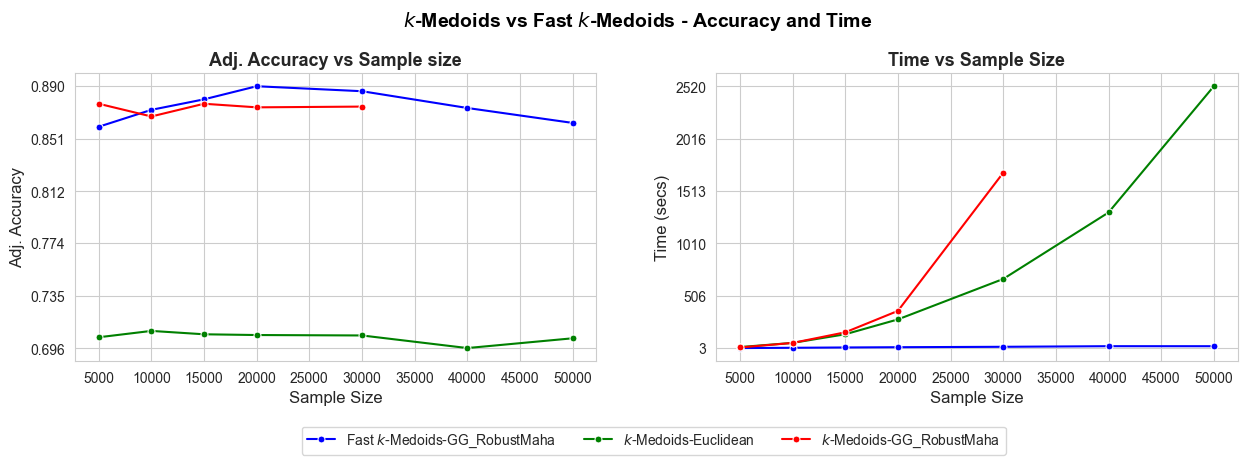

In [38]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))
axes = axes.flatten()  

#######################################################################
# Accuracy plot 

sns.lineplot(x=best_accuracy['Fast K-Medoids-GG_RobustMaha'].keys(), 
             y=best_accuracy['Fast K-Medoids-GG_RobustMaha'].values(), 
             color='blue', marker='o',  markersize=5, 
             label='Fast $k$-Medoids-GG_RobustMaha', ax=axes[0])

sns.lineplot(x=best_accuracy['K-Medoids-Euclidean'].keys(), 
             y=best_accuracy['K-Medoids-Euclidean'].values(), 
             color='green', marker='o',  markersize=5, 
             label='$k$-Medoids-Euclidean', ax=axes[0])

sns.lineplot(x=best_accuracy['K-Medoids-GG_RobustMaha'].keys(), 
             y=best_accuracy['K-Medoids-GG_RobustMaha'].values(), 
             color='red', marker='o',  markersize=5, 
             label='$k$-Medoids-GG_RobustMaha', ax=axes[0])

#######################################################################
# Time plot 

sns.lineplot(x=times['Fast K-Medoids-GG_RobustMaha'].keys(), 
             y=times['Fast K-Medoids-GG_RobustMaha'].values(), 
             color='blue', marker='o', markersize=5, 
             label='Fast $k$-Medoids-GG_RobustMaha', ax=axes[1])

sns.lineplot(x=times['K-Medoids-Euclidean'].keys(), 
             y=times['K-Medoids-Euclidean'].values(), 
             color='green', marker='o', markersize=5, 
             label='$k$-Medoids-Euclidean', ax=axes[1])

sns.lineplot(x=times['K-Medoids-GG_RobustMaha'].keys(), 
             y=times['K-Medoids-GG_RobustMaha'].values(), 
             color='red', marker='o', markersize=5, 
             label='$k$-Medoids-GG_RobustMaha', ax=axes[1])

#######################################################################
# Plot details

axes[0].set_title('Adj. Accuracy vs Sample size', size=13, weight='bold')
axes[0].set_ylabel('Adj. Accuracy', size=12)
min_acc = min([min(best_accuracy[model].values()) for model in model_names])
max_acc = max([max(best_accuracy[model].values()) for model in model_names])
axes[0].set_yticks(np.round(np.linspace(min_acc, max_acc, 6),3))

axes[1].set_title('Time vs Sample Size', size=13, weight='bold')
axes[1].set_ylabel('Time (secs)', size=12)
min_time = min([min([x for x in times[model].values() if x != None]) for model in model_names])
max_time = max([max([x for x in times[model].values() if x != None]) for model in model_names])
axes[1].set_yticks(np.round(np.linspace(min_time, max_time, 6),3))

for i in range(len(axes)):
    axes[i].set_xticks(data_sizes + [25000, 35000, 45000])
    axes[i].set_xlabel('Sample Size', size=12)
    axes[i].legend().set_visible(False)


handles, labels = axes[1].get_legend_handles_labels()
plt.legend(handles=handles, labels=labels, loc='lower center', bbox_to_anchor=(-0.12, -0.35), ncol=len(labels), fontsize=10)
plt.subplots_adjust(top=0.83)
plt.suptitle('$k$-Medoids vs Fast $k$-Medoids - Accuracy and Time', fontsize=14, y=0.99, weight='bold', color='black', alpha=1)
plt.subplots_adjust(hspace=0.5, wspace=0.23) 

file_name = 'plots/kmedoids_vs_fast_kmedoids'
fig.savefig(file_name + '.jpg', format='jpg', dpi=500, bbox_inches="tight", pad_inches=0.2)

plt.show()

In [37]:
for model_name in model_names:
    for size in data_sizes:
        if times[model_name][size] == None:
            print(f'MemoryError for {model_name} with size {size}')

MemoryError for K-Medoids-GG_RobustMaha with size 40000
MemoryError for K-Medoids-GG_RobustMaha with size 50000
